# BRD4
[Cornelia de Lange syndrome-6 (CDLS6)](https://omim.org/entry/620568) is caused by heterozygous mutation in the BRD4 gene. At the time of this writing, we did not identify publications about genotype-phenotype correlations in BRD4.

[Jouret G, et al. Understanding the new BRD4-related syndrome: Clinical and genomic delineation with an international cohort study. Clin Genet. 2022](https://pubmed.ncbi.nlm.nih.gov/35470444/) stated:

>  No correlation was identified between severity of neurodevelopment delay and type of variant (large deletion, null variant, missense variant)

The authors concluded that more data would be needed to test for the presence of genotype-phenotype correlations in this gene. At the time of this writing (Nov. 8, 2024), no additional relevant datasets have been publöished.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-05-06
Using gpsea version 0.9.11


## BRD4
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for BRD4.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service

gene_symbol = 'BRD4'
mane_tx_id = 'NM_001379291.1'
mane_protein_id = 'NP_001366220.1' # bromodomain containing 4 (BRD4), transcript variant 4
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.24'
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    cdls6_phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(cdls6_phenopackets)} phenopackets ({gene_symbol}).')

Loaded 18 phenopackets (BRD4).


In [4]:

from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=cdls6_phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 18/18 [00:07<00:00,  2.34 individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #3
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)
  patient #10
    individual
     warnings:
     ·ontology_class of the time_at_last_encounter field cannot be parsed into age. Consider formatting the age as ISO8601 duration (e.g., "P31Y2M" for 31 years and 2 months)


In [5]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
15,Microcephaly
15,Global developmental delay
10,Short nose
10,Highly arched eyebrow
8,Synophrys
7,Intellectual disability
7,Sparse eyebrow
6,Anteverted nares
5,Intrauterine growth retardation
4,Macrotia


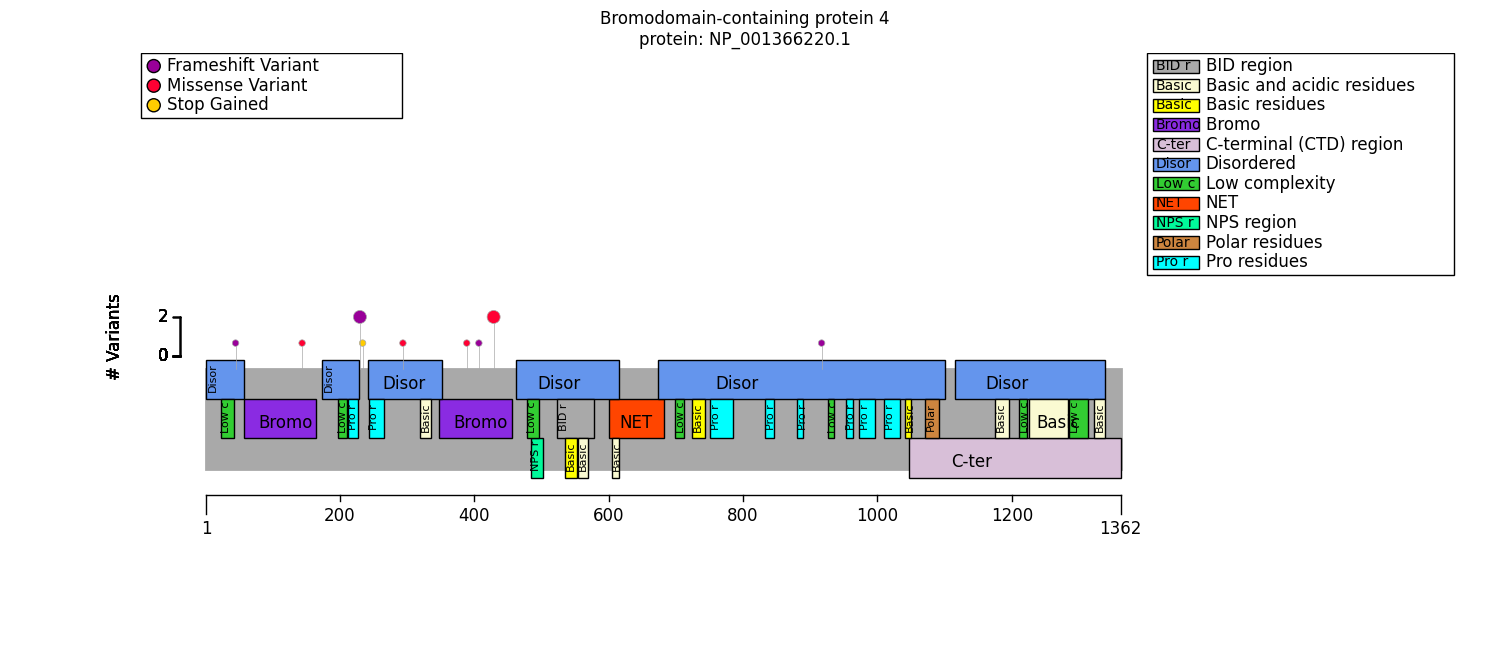

In [6]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

brd4_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
brd4_fig.tight_layout()

# Genotype Phenotype Correlation (GPC) Analysis

We are aware of no published GPC related to variants in the BRD4 gene. We will test a correlation between the most common variant type (transcript ablation).

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)

pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.model import VariantEffect
from gpsea.analysis.clf import monoallelic_classifier
from gpsea.analysis.predicate import variant_effect
from gpsea.view import MtcStatsViewer

ablation = variant_effect(effect=VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id)
ablation_clf = monoallelic_classifier(
    a_predicate=ablation,
    b_predicate=~ablation,
    a_label="ablation",
    b_label="other"
)
ablation_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=ablation_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(ablation_result)

Reason,Count
Skip terms if all counts are identical to counts for a child term,11
"Skipping ""general"" level terms",47
Skipping terms that are rare on the cohort level (in less than 40% of the cohort members),121


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=ablation_result)

Allele group,ablation,other,Corrected p values,p values
Macrotia [HP:0000400],4/5 (80%),0/4 (0%),1.0,0.047619
Microcephaly [HP:0000252],7/7 (100%),8/11 (73%),1.0,0.245098
Intrauterine growth retardation [HP:0001511],3/5 (60%),2/9 (22%),1.0,0.265734
Hypoplasia of the corpus callosum [HP:0002079],2/6 (33%),0/6 (0%),1.0,0.454545
Short nose [HP:0003196],5/5 (100%),5/7 (71%),1.0,0.469697
Highly arched eyebrow [HP:0002553],5/5 (100%),5/7 (71%),1.0,0.469697
Psychosis [HP:0000709],0/3 (0%),1/8 (12%),1.0,1.000000
Compulsive behaviors [HP:0000722],0/3 (0%),1/8 (12%),1.0,1.000000
Downslanted palpebral fissures [HP:0000494],1/4 (25%),2/5 (40%),1.0,1.000000
Low-set ears [HP:0000369],1/5 (20%),0/4 (0%),1.0,1.000000


# Compare CDLS6 with CDLS1
The above analysis failed to identify a signfiicant genotype-phenotype correlation within the CDLS6 cohort. In the following,
we address the hypothesis that the distribution of phenotypic features is significantly different between CDLS6 and CDLS1.

In [10]:
from gpsea.preprocessing import configure_caching_cohort_creator

NIPBL_symbol = "NIPBL"
with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    nipbl_phenopackets = tuple(ps.iter_cohort_phenopackets(NIPBL_symbol))

print(f'Loaded {len(nipbl_phenopackets)} phenopackets ({NIPBL_symbol}).')
cdls_phenopackets = list()
cdls_phenopackets.extend(cdls6_phenopackets)
cdls_phenopackets.extend(nipbl_phenopackets)
print(f"Combining {len(nipbl_phenopackets)} NIPBL phenopackets and {len(cdls6_phenopackets)} BRD4 phenopackets")
print(f"Got total of {len(cdls_phenopackets)} phenopackets")
cohort_creator = configure_caching_cohort_creator(hpo)
combined_cohort, qc_results = load_phenopackets(cdls_phenopackets, cohort_creator)  


Loaded 60 phenopackets (NIPBL).
Combining 60 NIPBL phenopackets and 18 BRD4 phenopackets
Got total of 78 phenopackets
Individuals Processed: 100%|██████████| 78/78 [00:17<00:00,  4.41 individuals/s]


In [11]:
from gpsea.analysis.predicate import gene

nipbl = gene(symbol="NIPBL")
brd4 = gene(symbol="BRD4")
dx_clf = monoallelic_classifier(
    a_predicate=nipbl,
    b_predicate= brd4,
    a_label='NIPBL',
    b_label= 'BRD4'
)
dx_result = analysis.compare_genotype_vs_phenotypes(
    cohort=combined_cohort,
    gt_clf=dx_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, dx_result)

Allele group,NIPBL,BRD4,Corrected p values,p values
Synophrys [HP:0000664],46/49 (94%),8/13 (62%),0.199381,0.007635
Intrauterine growth retardation [HP:0001511],39/52 (75%),5/14 (36%),0.199381,0.009726
Long philtrum [HP:0000343],37/46 (80%),3/7 (43%),0.721570,0.052798
Highly arched eyebrow [HP:0002553],36/38 (95%),10/12 (83%),1.000000,0.239917
Ventricular septal defect [HP:0001629],3/42 (7%),3/17 (18%),1.000000,0.341201
Clinodactyly of the 5th finger [HP:0004209],23/47 (49%),2/2 (100%),1.000000,0.489796
Global developmental delay [HP:0001263],42/46 (91%),15/15 (100%),1.000000,0.563672
Finger clinodactyly [HP:0040019],23/31 (74%),2/2 (100%),1.000000,1.000000
Gastroesophageal reflux [HP:0002020],25/40 (62%),1/1 (100%),1.000000,1.000000
Clinodactyly [HP:0030084],26/34 (76%),2/2 (100%),1.000000,1.000000


# Summary

In [12]:
from gpseacs.report import  GPAnalysisResultSummary, GpseaAnalysisReport

f_results =  (
 GPAnalysisResultSummary.from_multi(
        result=ablation_result,
    ), GPAnalysisResultSummary.from_multi(
        result=dx_result,
    ),
)

report = GpseaAnalysisReport(
    name=gene_symbol,
    cohort=cohort,
    fet_results=f_results,
    gene_symbol=gene_symbol,
    mane_tx_id=mane_tx_id,
    mane_protein_id=mane_protein_id,
)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
ablation,other,27,0
Genotype (A),Genotype (B),Tests performed,Significant tests
NIPBL,BRD4,41,0


In [14]:
summarizer.process_latex(report=report, protein_fig=brd4_fig)

Figure saved to ../../supplement/img/BRD4_protein_diagram-draft.pdf
Output to ../../supplement/tex/BRD4_summary_draft.tex


*-* EOF *-*